In [1]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt  

In [2]:
data = pd.read_csv("Concrete_data.csv")

In [3]:
data = data.sample(frac = 1)

In [4]:
data

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
920,136.0,162.0,126.0,172.0,10.0,923.0,764.0,28,29.07
438,167.0,75.4,167.0,164.0,7.9,1007.3,770.1,28,41.41
340,297.2,0.0,117.5,174.8,9.5,1022.8,753.5,14,36.99
381,315.0,137.0,0.0,145.0,5.9,1130.0,745.0,28,81.75
615,277.0,0.0,0.0,191.0,0.0,968.0,856.0,180,32.33
...,...,...,...,...,...,...,...,...,...
177,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
117,313.3,262.2,0.0,175.5,8.6,1046.9,611.8,28,59.80
668,153.0,102.0,0.0,192.0,0.0,888.0,943.1,3,4.78
114,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,22.90


SPLITTING THE DATA (TRAIN AND TEST)

In [5]:
data_train  = data.iloc[0 : 900] 
data_test = data.iloc[900 : ]

In [6]:
data_train = data_train.values
data_train

array([[136.  , 162.  , 126.  , ..., 764.  ,  28.  ,  29.07],
       [167.  ,  75.4 , 167.  , ..., 770.1 ,  28.  ,  41.41],
       [297.2 ,   0.  , 117.5 , ..., 753.5 ,  14.  ,  36.99],
       ...,
       [153.  , 239.  ,   0.  , ..., 684.  ,  28.  ,  26.86],
       [359.  ,  19.  , 141.  , ..., 801.  ,  28.  ,  62.94],
       [304.  ,  76.  ,   0.  , ..., 670.  , 270.  ,  54.38]])

In [7]:
x = data_train[: , : -1]
y = data_train[: , -1].reshape(data_train.shape[0] , 1)

In [8]:
data_test = data_test.values

x_test = data_test[: , : -1]
y_test = data_test[: , -1].reshape(data_test.shape[0] , 1)

DATA FOR TRAIN AND TEST

In [9]:
print(x)                #train_x
print(y)                #train_y

print(x_test)           #test_x
print(y_test)           #test_y

[[ 136.   162.   126.  ...  923.   764.    28. ]
 [ 167.    75.4  167.  ... 1007.3  770.1   28. ]
 [ 297.2    0.   117.5 ... 1022.8  753.5   14. ]
 ...
 [ 153.   239.     0.  ... 1002.   684.    28. ]
 [ 359.    19.   141.  ...  942.   801.    28. ]
 [ 304.    76.     0.  ...  932.   670.   270. ]]
[[29.07]
 [41.41]
 [36.99]
 [81.75]
 [32.33]
 [77.3 ]
 [36.84]
 [11.36]
 [57.21]
 [49.77]
 [79.4 ]
 [65.2 ]
 [27.94]
 [ 8.06]
 [49.99]
 [29.87]
 [27.04]
 [55.06]
 [35.31]
 [48.15]
 [29.16]
 [13.71]
 [64.02]
 [29.75]
 [10.34]
 [41.84]
 [25.1 ]
 [24.58]
 [15.07]
 [39.42]
 [41.16]
 [19.35]
 [43.73]
 [ 9.01]
 [22.44]
 [31.54]
 [13.4 ]
 [25.42]
 [12.73]
 [28.68]
 [12.05]
 [38.46]
 [50.7 ]
 [41.54]
 [43.8 ]
 [33.76]
 [36.94]
 [31.35]
 [44.03]
 [55.16]
 [31.81]
 [35.08]
 [ 8.  ]
 [74.19]
 [54.1 ]
 [18.13]
 [24.28]
 [ 8.37]
 [42.64]
 [38.07]
 [63.14]
 [ 9.87]
 [21.16]
 [37.43]
 [12.47]
 [33.04]
 [26.94]
 [38.21]
 [66.6 ]
 [30.57]
 [21.26]
 [67.7 ]
 [27.42]
 [40.27]
 [23.52]
 [35.34]
 [51.72]
 [20.28

SHAPE OF OUR DATA

In [10]:
print("shape (x_train) : " , x.shape)
print("shape (y_train) : " , y.shape)
print("shape (x_test) : " , x_test.shape)
print("shape (y_test) : " , y_test.shape)

shape (x_train) :  (900, 8)
shape (y_train) :  (900, 1)
shape (x_test) :  (130, 8)
shape (y_test) :  (130, 1)


## y_pred = m3.x3 + m2.x2 + m1.x1 + m0

## y_pred = matrix_mul(X , m)

To do proper matrix multiplication of m and theta we need to add extra column of 1's before X 

Because we are multiplying x1 with m1 , x2 with m2 so for m0 we need an extra column

In [11]:
x

array([[ 136. ,  162. ,  126. , ...,  923. ,  764. ,   28. ],
       [ 167. ,   75.4,  167. , ..., 1007.3,  770.1,   28. ],
       [ 297.2,    0. ,  117.5, ..., 1022.8,  753.5,   14. ],
       ...,
       [ 153. ,  239. ,    0. , ..., 1002. ,  684. ,   28. ],
       [ 359. ,   19. ,  141. , ...,  942. ,  801. ,   28. ],
       [ 304. ,   76. ,    0. , ...,  932. ,  670. ,  270. ]])

In [12]:
x = np.vstack((np.ones((x.shape[0] , )) , x.T)).T
x_test = np.vstack((np.ones((x_test.shape[0] , )) , x_test.T)).T

In [13]:
x

array([[1.0000e+00, 1.3600e+02, 1.6200e+02, ..., 9.2300e+02, 7.6400e+02,
        2.8000e+01],
       [1.0000e+00, 1.6700e+02, 7.5400e+01, ..., 1.0073e+03, 7.7010e+02,
        2.8000e+01],
       [1.0000e+00, 2.9720e+02, 0.0000e+00, ..., 1.0228e+03, 7.5350e+02,
        1.4000e+01],
       ...,
       [1.0000e+00, 1.5300e+02, 2.3900e+02, ..., 1.0020e+03, 6.8400e+02,
        2.8000e+01],
       [1.0000e+00, 3.5900e+02, 1.9000e+01, ..., 9.4200e+02, 8.0100e+02,
        2.8000e+01],
       [1.0000e+00, 3.0400e+02, 7.6000e+01, ..., 9.3200e+02, 6.7000e+02,
        2.7000e+02]])

# MODEL

Now we will train the model :

Will be using gradient descent to train our model , it is one of the best training methods to predict the values by finding the minima from which we can get our intercept and slopes . 
It uses learning rate to find the minima and simultaneously changes the intercept and slopes (to get the best one) by calculating the error with the cost function.


In [14]:
def model(x , y , learning_rate , iteration) :
    
    m = y.size                                    #900
    theta = np.zeros((x.shape[1] , 1))
    cost_list = []
    
#     print(theta)
#     print(x)
#     print(m)

    for i in range(iteration) :
        
        y_pred = np.dot(x , theta)
        
        cost = (1/(2*m))*np.sum(np.square(y_pred - y))
        
        d_theta = (1/m)*np.dot(x.T , y_pred - y)
        
        theta = theta - (learning_rate * d_theta)
        
        cost_list.append(cost)
        
        if(i%(iteration/10) == 0) :
            
            print("cost : " , cost)
            
    return theta , cost_list

Here theta is the array of intercept and slopes which initially contains null values .
As we go on performing iterations the value of intercept and slopes will go on updating .

In [15]:
iteration = 100000
learning_rate = 0.00000009

theta , cost_list = model(x , y , learning_rate , iteration)

900
cost :  785.6787935555556
cost :  60.39748052822499
cost :  56.3129995384454
cost :  55.057180333192115
cost :  54.63044968856956
cost :  54.48175349547402
cost :  54.426903478249535
cost :  54.403809692010704
cost :  54.39153280657423
cost :  54.38300943014836


GRAPH FOR COST

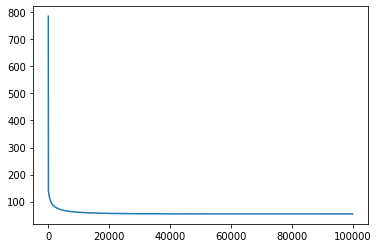

In [16]:
rng = np.arange(0 , iteration)
plt.plot(rng , cost_list)
plt.show()

PREDICTION

In [17]:
y_pred = np.dot(x_test , theta)

In [18]:
y_pred

array([[51.42030731],
       [51.41464882],
       [22.1989599 ],
       [32.43323517],
       [28.99263322],
       [56.7639343 ],
       [35.77816004],
       [33.05808866],
       [30.67729057],
       [60.64519437],
       [46.11135444],
       [30.37372077],
       [30.83086616],
       [29.91621152],
       [61.4677169 ],
       [35.48387214],
       [56.53701465],
       [35.99634936],
       [22.00444589],
       [58.16302343],
       [49.68609943],
       [34.84645575],
       [16.65795669],
       [34.04808703],
       [42.24253883],
       [33.37942775],
       [32.45297304],
       [55.92304495],
       [42.41906001],
       [26.07860836],
       [49.20817364],
       [37.63852699],
       [20.05852888],
       [56.620046  ],
       [36.09203311],
       [56.59106838],
       [40.59404706],
       [25.14515671],
       [39.54461761],
       [48.57942752],
       [61.28584588],
       [36.98981807],
       [26.65194297],
       [26.93618218],
       [25.07693122],
       [36

ACCURACY

In [19]:
error = (1/x_test.shape[0])*np.sum(np.abs(y_pred - y_test))
print("Error : " , error*100 , "%")
print("Accuracy : " , (1 - error)*100 , "%")

Error :  803.6244022118101 %
Accuracy :  -703.6244022118101 %


DATAFRAME

In [20]:
df = pd.DataFrame(y_test)
df['Predicted'] = y_pred

df.columns = ['Actual' , 'Predicted']

In [21]:
df

,Actual,Predicted
0,59.49,51.420307
1,37.92,51.414649
2,18.28,22.198960
3,22.95,32.433235
4,33.73,28.992633
...,...,...
125,79.30,60.538473
126,59.80,51.145371
127,4.78,13.132899
128,22.90,50.954665


In [22]:
print("INTERCEPT AND SLPOES")
print(theta)

INTERCEPT AND SLPOES
[[-1.48193893e-04]
 [ 1.19259293e-01]
 [ 1.00358812e-01]
 [ 9.03760921e-02]
 [-1.99165579e-01]
 [ 6.00774887e-02]
 [ 8.67187736e-03]
 [ 1.57424048e-02]
 [ 1.14092953e-01]]
